<img src="./event_logo.png" width="400">

# Международная научно-техническая конференция «Микроэлектронные имплантируемые нейроинтерфейсы 2024» (МИН-2024) 

## Импорт библиотек

In [66]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Импортирование набора данных

In [69]:
battery=pd.read_csv('dataset.csv')
x = battery.iloc[:, 3:10].values
y = battery.iloc[:, -1].values
battery

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic
...,...,...,...,...,...,...,...,...,...,...,...
334,mp-764961,Li6Co(SiO4)2,P1,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic
335,mp-849520,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic
336,mp-849656,Li5Co4(Si3O10)2,P1,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic
337,mp-763557,LiCoSiO4,P1,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic


In [71]:
# Случайная выборка данных
battery.sample(5)

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
226,mp-763624,Li2Fe(SiO3)2,Pm21n,-2.726,0.080,2.880,66,3.017,732.676,True,orthorhombic
330,mp-763462,Li2Co3(SiO4)2,P1,-2.343,0.024,2.470,45,3.408,547.959,True,triclinic
22,mp-849217,Li4Mn(SiO3)3,C2,-2.794,0.083,2.862,34,2.649,389.814,True,monoclinic
188,mp-763641,LiFeSiO4,Pb21a,-2.598,0.023,2.959,56,2.881,714.127,True,orthorhombic
272,mp-766967,Li2Mn3(Si3O8)2,P1,-2.894,0.043,2.865,54,3.012,665.118,True,triclinic


## Кодирование независимых переменных

In [74]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

battery["Formula_encoded"] = lb_make.fit_transform(battery["Formula"])
battery[["Formula", "Formula_encoded"]]

battery["Has Bandstructure_encoded"] = lb_make.fit_transform(battery["Has Bandstructure"])
battery[["Has Bandstructure", "Has Bandstructure_encoded"]]

battery["Spacegroup_encoded"]=lb_make.fit_transform(battery["Spacegroup"])
battery[["Spacegroup","Spacegroup_encoded"]]

column_names = ["Materials Id", "Formula_encoded", "Spacegroup_encoded","Formation Energy (eV)","E Above Hull (eV)","Band Gap (eV)","Nsites","Density (gm/cc)","Volume","Has Bandstructure_encoded","Has Bandstructure","Spacegroup","Crystal System"]

battery= battery.reindex(columns=column_names)
battery

,Materials Id,Formula_encoded,Spacegroup_encoded,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure_encoded,Has Bandstructure,Spacegroup,Crystal System
0,mp-849394,54,31,-2.699,0.006,3.462,16,2.993,178.513,1,True,Pc,monoclinic
1,mp-783909,54,21,-2.696,0.008,2.879,32,2.926,365.272,1,True,P21/c,monoclinic
2,mp-761311,81,6,-2.775,0.012,3.653,28,2.761,301.775,1,True,Cc,monoclinic
3,mp-761598,79,1,-2.783,0.013,3.015,38,2.908,436.183,1,True,C2/c,monoclinic
4,mp-767709,48,1,-2.747,0.016,2.578,36,3.334,421.286,1,True,C2/c,monoclinic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,mp-764961,89,16,-2.545,0.071,2.685,17,2.753,171.772,1,True,P1,triclinic
335,mp-849520,99,16,-2.250,0.076,0.005,42,3.318,552.402,1,True,P1,triclinic
336,mp-849656,83,16,-2.529,0.082,0.176,35,2.940,428.648,1,True,P1,triclinic
337,mp-763557,100,16,-2.348,0.087,1.333,14,2.451,214.044,1,True,P1,triclinic


## Распределение данных в целевой переменной распределение данных по классам

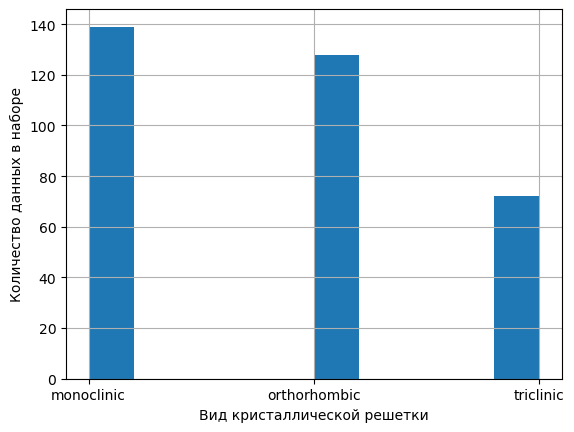

In [77]:
plt.hist(battery.iloc[:, -1])
plt.xlabel("Вид кристаллической решетки")
plt.ylabel("Количество данных в наборе")
plt.grid()
plt.show()

## Корреляционный анализ

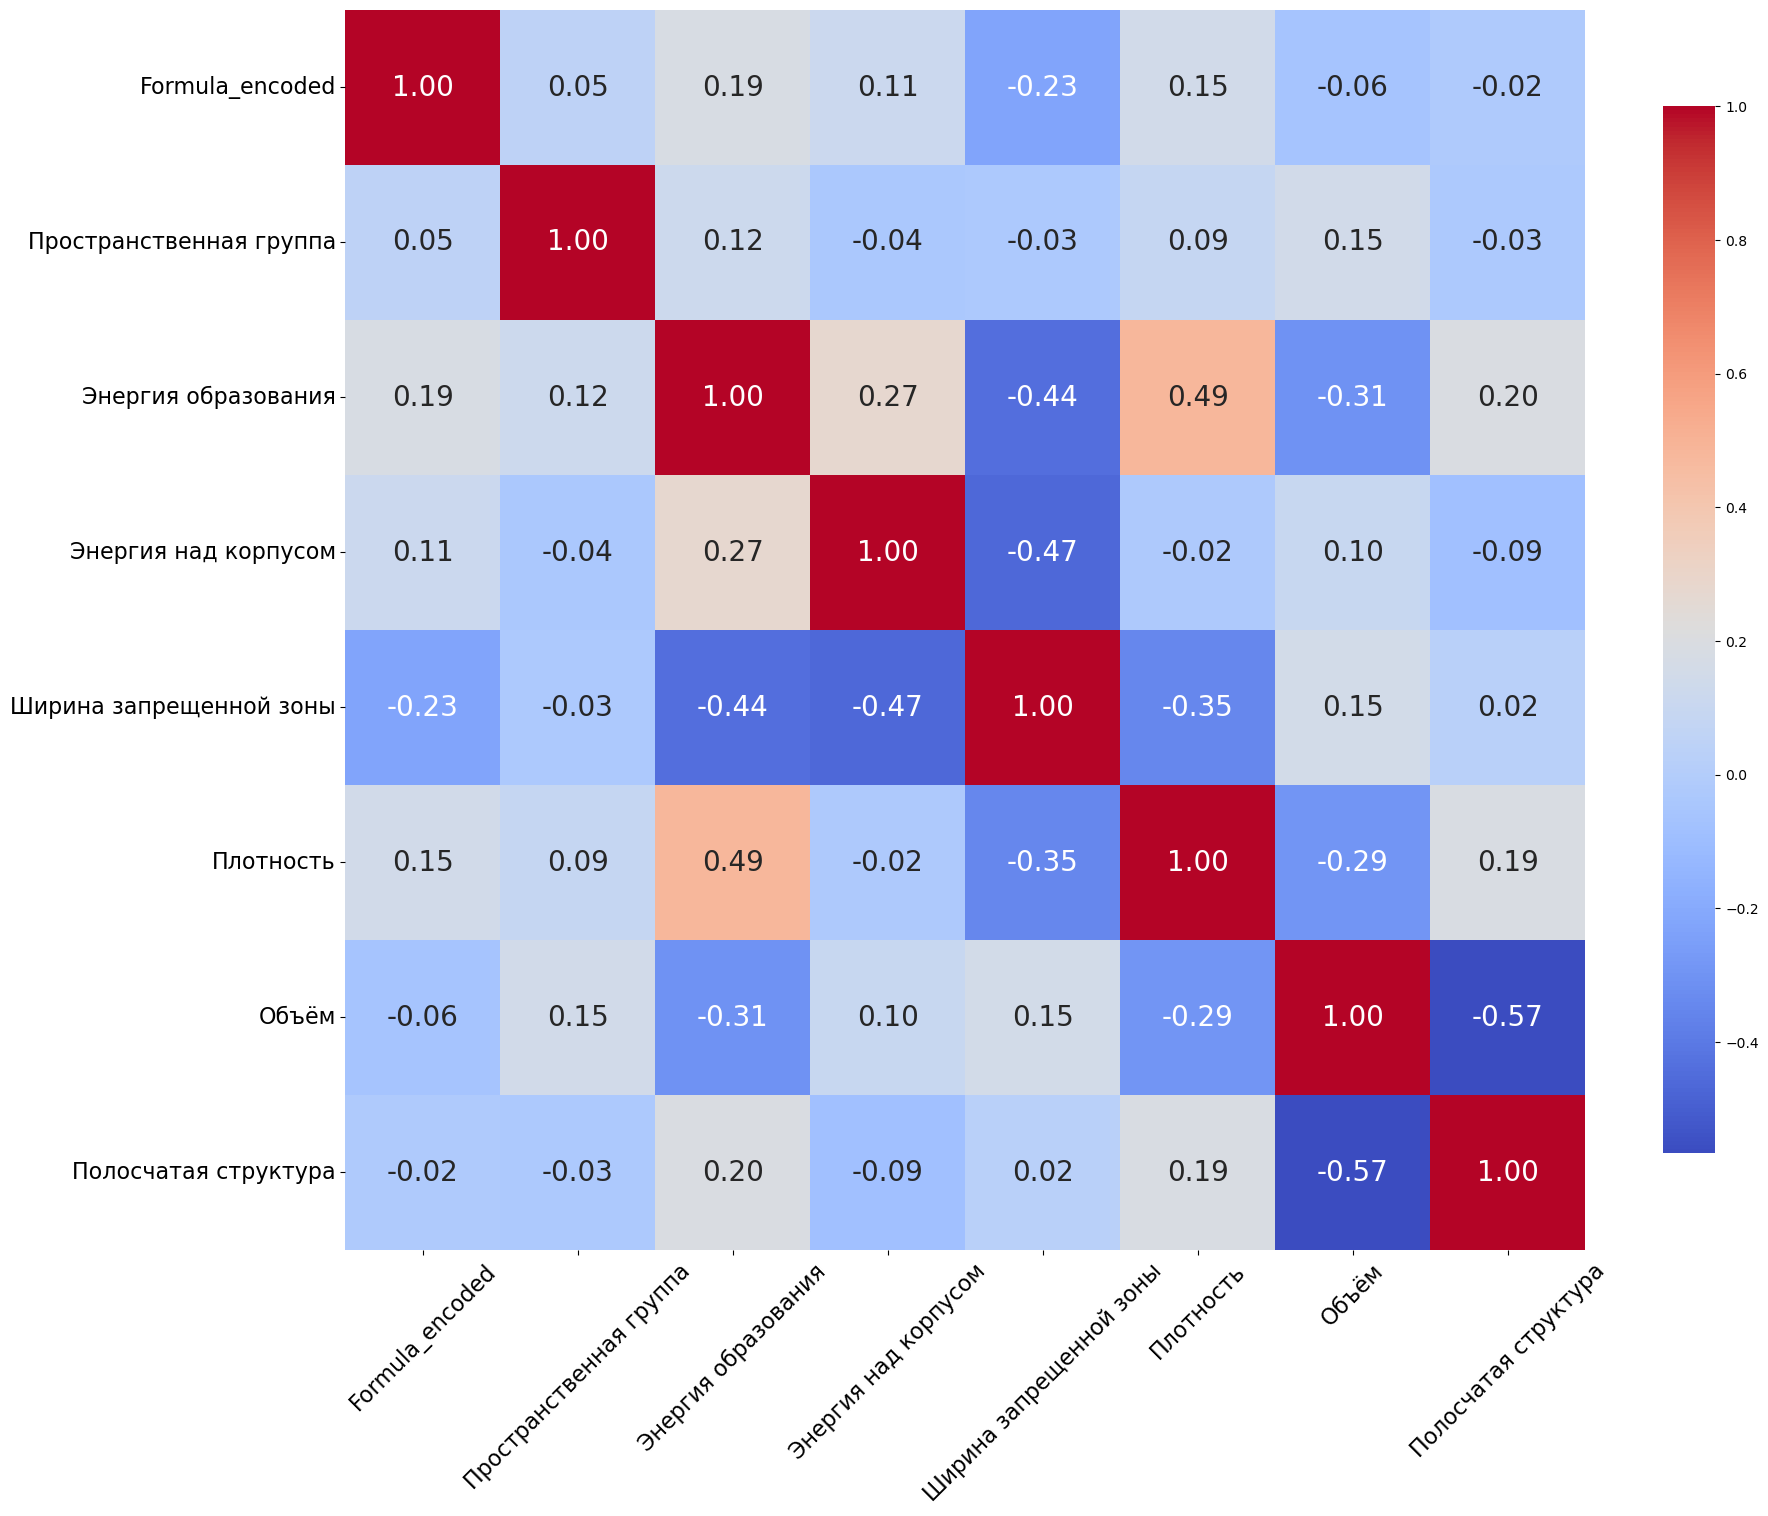

In [87]:
import seaborn as sns
copy_d = battery.iloc[:,1:10]

copy_d = copy_d.rename(
    columns={"Formula": "Формула", "Spacegroup_encoded": "Пространственная группа", "Formation Energy (eV)": "Энергия образования",
            "E Above Hull (eV)": "Энергия над корпусом", "Band Gap (eV)": "Ширина запрещенной зоны", "Nsites": "Кол-во атомов",
            "Volume":"Объём", "Has Bandstructure_encoded": "Полосчатая структура", "Density (gm/cc)": "Плотность"}
)

# Рассчет корреляционной матрицы
correlation_matrix = copy_d.corr()

# Построение тепловой карты корреляции
plt.figure(figsize=(20, 17))
heatmap = sns.heatmap(
    correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8},  annot_kws={'size':20})
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=16, rotation=45)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=16)

plt.show()

## Удаление признака "Кол-во атомов" (Nsites)

In [83]:
battery.drop(columns=['Nsites'], inplace=True)
battery

,Materials Id,Formula_encoded,Spacegroup_encoded,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Density (gm/cc),Volume,Has Bandstructure_encoded,Has Bandstructure,Spacegroup,Crystal System
0,mp-849394,54,31,-2.699,0.006,3.462,2.993,178.513,1,True,Pc,monoclinic
1,mp-783909,54,21,-2.696,0.008,2.879,2.926,365.272,1,True,P21/c,monoclinic
2,mp-761311,81,6,-2.775,0.012,3.653,2.761,301.775,1,True,Cc,monoclinic
3,mp-761598,79,1,-2.783,0.013,3.015,2.908,436.183,1,True,C2/c,monoclinic
4,mp-767709,48,1,-2.747,0.016,2.578,3.334,421.286,1,True,C2/c,monoclinic
...,...,...,...,...,...,...,...,...,...,...,...,...
334,mp-764961,89,16,-2.545,0.071,2.685,2.753,171.772,1,True,P1,triclinic
335,mp-849520,99,16,-2.250,0.076,0.005,3.318,552.402,1,True,P1,triclinic
336,mp-849656,83,16,-2.529,0.082,0.176,2.940,428.648,1,True,P1,triclinic
337,mp-763557,100,16,-2.348,0.087,1.333,2.451,214.044,1,True,P1,triclinic


## Разделение переменных x и y

In [89]:
x = battery.iloc[:,2:9].values #use this for pandas data frame
y = battery.iloc[:,-1].values

## Кодировать зависимую переменную

In [92]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y=le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


## Разделить набор данных на тренировочны и тестовый набор

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

## Масштабирование признаков

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Импортирование функций для расчёта точности

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Обучение логистической регрессии

In [104]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("===========")
print(accuracy_score(y_test, y_pred))
print("===========")
print(classification_report(y_test, y_pred))
print("===========")

[[38 15  5]
 [16 34  4]
 [16  5  3]]
0.5514705882352942
              precision    recall  f1-score   support

           0       0.54      0.66      0.59        58
           1       0.63      0.63      0.63        54
           2       0.25      0.12      0.17        24

    accuracy                           0.55       136
   macro avg       0.47      0.47      0.46       136
weighted avg       0.53      0.55      0.53       136



## Метод k-ближайших соседей

In [107]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("===========")
print(accuracy_score(y_test, y_pred))
print("===========")
print(classification_report(y_test, y_pred))
print("===========")

[[32 11 15]
 [15 31  8]
 [ 8  0 16]]
0.5808823529411765
              precision    recall  f1-score   support

           0       0.58      0.55      0.57        58
           1       0.74      0.57      0.65        54
           2       0.41      0.67      0.51        24

    accuracy                           0.58       136
   macro avg       0.58      0.60      0.57       136
weighted avg       0.61      0.58      0.59       136



## Наивный байесовский классификатор

In [110]:
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("===========")
print(accuracy_score(y_test, y_pred))
print("===========")
print(classification_report(y_test, y_pred))
print("===========")

[[42 16  0]
 [23 31  0]
 [ 0  0 24]]
0.7132352941176471
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        58
           1       0.66      0.57      0.61        54
           2       1.00      1.00      1.00        24

    accuracy                           0.71       136
   macro avg       0.77      0.77      0.77       136
weighted avg       0.71      0.71      0.71       136



## Метод случайного леса

In [113]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("===========")
print(accuracy_score(y_test, y_pred))
print("===========")
print(classification_report(y_test, y_pred))
print("===========")

[[49  9  0]
 [10 44  0]
 [ 2  0 22]]
0.8455882352941176
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        58
           1       0.83      0.81      0.82        54
           2       1.00      0.92      0.96        24

    accuracy                           0.85       136
   macro avg       0.88      0.86      0.87       136
weighted avg       0.85      0.85      0.85       136



## Классификатор дерева решений

In [116]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("===========")
print(accuracy_score(y_test, y_pred))
print("===========")
print(classification_report(y_test, y_pred))
print("===========")

[[58  0  0]
 [ 0 54  0]
 [ 0  0 24]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        24

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



## Визуализируем дерево решений

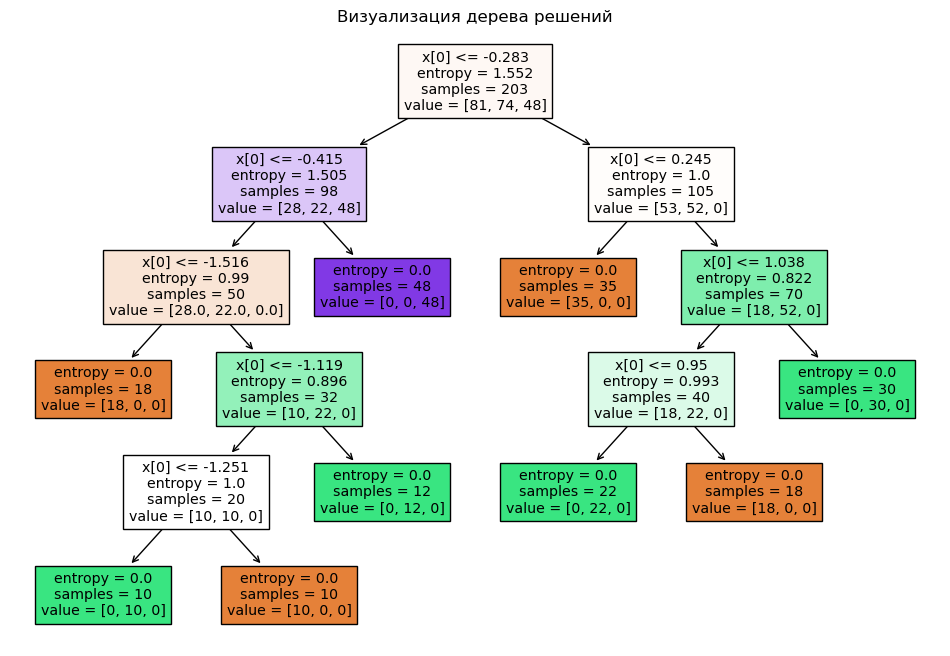

In [123]:
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True)
plt.title("Визуализация дерева решений")
plt.show()

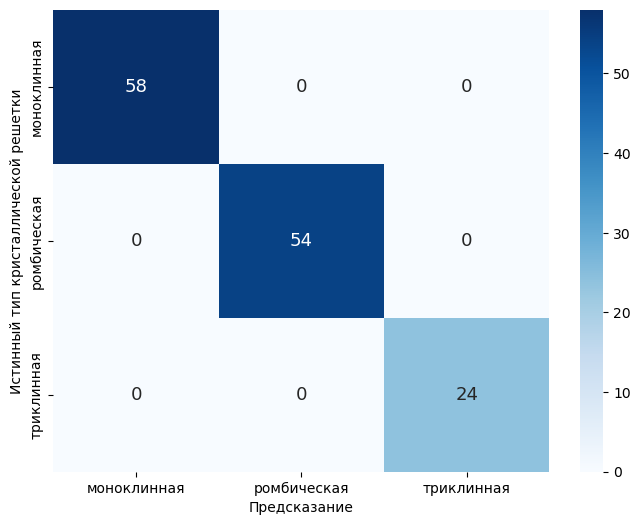

In [125]:
# Визуализируем нормализованную матрицу ошибок
cm_normalized = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=["моноклинная", "ромбическая", "триклинная"], 
            yticklabels=["моноклинная", "ромбическая", "триклинная"], annot_kws={'size':13})
plt.xlabel('Предсказание')
plt.ylabel('Истинный тип кристаллической решетки')
plt.show()

## Метод опорных векторов

In [128]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("===========")
print(accuracy_score(y_test, y_pred))
print("===========")
print(classification_report(y_test, y_pred))
print("===========")

[[41  8  9]
 [20 30  4]
 [ 9  0 15]]
0.6323529411764706
              precision    recall  f1-score   support

           0       0.59      0.71      0.64        58
           1       0.79      0.56      0.65        54
           2       0.54      0.62      0.58        24

    accuracy                           0.63       136
   macro avg       0.64      0.63      0.62       136
weighted avg       0.66      0.63      0.63       136

